In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import csv
import pandas.util.testing as tm

import umap
import hdbscan

%matplotlib inline

In [96]:
df_= pd.read_csv('../data2/processed/DATAFRAME.csv', index_col = 0)

In [98]:
df_.head(1)

,id,vat,total_value,total_quantity,Wristband_value,Wristband_quantity,RFID_value,RFID_quantity,Tickets_value,Tickets_quantity,...,Ribbon_value,Ribbon_quantity,TicketPrinter_value,TicketPrinter_quantity,Printhead_value,Printhead_quantity,Accessories_value,Accessories_quantity,provincia_encoded,cnae_encoded
0,125,A28415495,239.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,199


In [99]:
df = df_.drop(['id','vat'], axis=1)
df.shape

(9618, 34)

# The UMAP reduction finally choosed

/home/alberto/miniconda3/envs/project_env/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/envs/project_env/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


CPU times: user 52.7 s, sys: 216 ms, total: 52.9 s
Wall time: 51.3 s


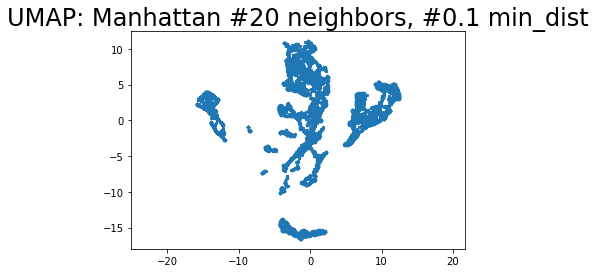

In [103]:
fit = umap.UMAP(
        n_neighbors=20,
        min_dist=0.1,
        n_components=2,
        metric='manhattan',
        random_state= 42)
%time u = fit.fit_transform(df)
plt.scatter(u[:, 0], u[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP: Manhattan #20 neighbors, #0.1 min_dist', fontsize=24);  

Applying the HDBSCAN to identify clusters


In [112]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
clusterer.fit(u)
clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

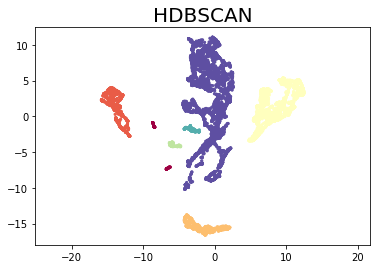

In [113]:
plt.scatter(u[:, 0], u[:, 1], c=clusterer.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
#plt.colorbar(boundaries=np.arange(len(np.unique(clusterer.labels_)))+1).set_ticks(np.arange(len(np.unique(clusterer.labels_))))
plt.title('HDBSCAN', fontsize=20);

# Decido trabajar con esta clusterización

In [116]:
clusterer.labels_

array([0, 5, 5, ..., 2, 2, 5])

In [117]:
df_['clusters'] = clusterer.labels_

In [118]:
df_

,id,vat,total_value,total_quantity,Wristband_value,Wristband_quantity,RFID_value,RFID_quantity,Tickets_value,Tickets_quantity,...,Ribbon_quantity,TicketPrinter_value,TicketPrinter_quantity,Printhead_value,Printhead_quantity,Accessories_value,Accessories_quantity,provincia_encoded,cnae_encoded,clusters
0,125,A28415495,239.00,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,30,199,0
1,139,B12026183,43.80,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,43.80,1.0,11,263,5
2,149,B64898562,432.80,16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,103.38,3.0,7,375,5
3,32275,B64898562,432.80,16,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.00,0.0,7,375,5
4,32405,B64898562,432.80,16,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,7,375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10397,119197,B66572249,85.79,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,7,376,2
10398,119338,B34204974,472.50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,36,307,2
10399,119340,B70135371,472.50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,336,2
10400,119376,47364071X,366.41,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,25,411,2


In [120]:
df_['clusters'].value_counts()

 5    5144
 2    2287
 0     979
 1     738
 4     189
 3     168
-1     113
Name: clusters, dtype: int64

In [121]:
companies = pd.read_csv('../data2/processed/final_companies.csv', index_col = 0)

In [127]:
df_final = pd.merge(df_, companies, how = 'left', on = 'vat')

In [133]:
df_final.columns

Index(['id', 'vat', 'total_value', 'total_quantity', 'Wristband_value',
       'Wristband_quantity', 'RFID_value', 'RFID_quantity', 'Tickets_value',
       'Tickets_quantity', 'CardPrinter_value', 'CardPrinter_quantity',
       'TouchScreen_value', 'TouchScreen_quantity', 'Card_value',
       'Card_quantity', 'CardRibbon_value', 'CardRibbon_quantity',
       'Mobile_value', 'Mobile_quantity', 'Scanner_value', 'Scanner_quantity',
       'LabelPrinter_value', 'LabelPrinter_quantity', 'Label_value',
       'Label_quantity', 'Ribbon_value', 'Ribbon_quantity',
       'TicketPrinter_value', 'TicketPrinter_quantity', 'Printhead_value',
       'Printhead_quantity', 'Accessories_value', 'Accessories_quantity',
       'provincia_encoded_x', 'cnae_encoded_x', 'clusters', 'CNAE',
       'provincia', 'provincia_encoded_y', 'cnae_encoded_y'],
      dtype='object')

In [136]:
df_final = df_final[['clusters','id',
'vat',
'CNAE',
'provincia',
'total_value',
'total_quantity',
'Wristband_value',
'Wristband_quantity',
'RFID_value',
'RFID_quantity',
'Tickets_value',
'Tickets_quantity',
'CardPrinter_value',
'CardPrinter_quantity',
'TouchScreen_value',
'TouchScreen_quantity',
'Card_value',
'Card_quantity',
'CardRibbon_value',
'CardRibbon_quantity',
'Mobile_value',
'Mobile_quantity',
'Scanner_value',
'Scanner_quantity',
'LabelPrinter_value',
'LabelPrinter_quantity',
'Label_value',
'Label_quantity',
'Ribbon_value',
'Ribbon_quantity',
'TicketPrinter_value',
'TicketPrinter_quantity',
'Printhead_value',
'Printhead_quantity',
'Accessories_value',
'Accessories_quantity',
'provincia_encoded_x',
'cnae_encoded_x',
'provincia_encoded_y',
'cnae_encoded_y']]

In [138]:
df_final.to_csv('../data2/processed/FINAL_CLUSTERED.csv')